# Path of Exile game stats data eda2

dates: 2022.04.26 ~ 

This file contains an analysis processing of the game 'Path of Exile' data.

###### Origins of datas from here: 
poe_stats : https://www.kaggle.com/datasets/gagazet/path-of-exile-league-statistic

Data contains stats of 59000 players, from 4th August of 2017 and before now.

---

이 파일은 지난 3 파일에서 하드코어 모드와 일반모드를 나누었던 것에 이어서, 솔로모드와 파티가능모드로 나누어 볼 예정입니다. 

ladder 에 SSF가 붙은 모드는 솔로만 진행이 가능한 모드고 그렇지 않은 모드는 파티가능 모드입니다(인것으로 알고있습니다...)

# Dataset and libraries 

## data and libraries import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

df = pd.read_csv('poe_stats_2revisedrank.csv')

pd.options.display.float_format = '{:,.4f}'.format # 수 표현을 일부 바꿈

In [2]:
df.nunique()

rank             14981
dead                 2
online               2
name             58286
level               48
class               26
id               59776
experience       54124
account          37123
challenges          37
twitch            9613
ladder               4
special_class        2
stat_Str             2
stat_Int             2
stat_Dex             2
stats_num            3
dtype: int64

In [3]:
df.isnull().sum()

rank                 0
dead                 0
online               0
name                 0
level                0
class                0
id                   0
experience           0
account              0
challenges           0
twitch           43476
ladder               0
special_class        0
stat_Str             0
stat_Int             0
stat_Dex             0
stats_num            0
dtype: int64

In [4]:
df.ladder.unique()

array(['Harbinger', 'SSF Harbinger HC', 'Hardcore Harbinger',
       'SSF Harbinger'], dtype=object)

In [5]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,rank,level,experience,challenges,special_class,stat_Str,stat_Int,stat_Dex,stats_num
count,"59,776.00","59,776.00","59,776.00","59,776.00","59,776.00","59,776.00","59,776.00","59,776.00","59,776.00"
mean,"7,472.54",85.42,"1,825,786,027.36",25.76,0.99,0.58,0.42,0.51,1.51
std,"4,314.06",11.29,"1,094,747,934.61",8.44,0.09,0.49,0.49,0.50,0.61
min,1.00,53.00,"77,909,816.00",4.00,0.00,0.00,0.00,0.00,1.00
25%,"3,736.75",78.00,"777,469,746.25",19.00,1.00,0.00,0.00,0.00,1.00
50%,"7,472.50",90.00,"1,934,009,687.00",25.00,1.00,1.00,0.00,1.00,1.00
75%,"11,208.25",95.00,"2,876,116,901.00",33.00,1.00,1.00,1.00,1.00,2.00
max,"14,981.00",100.00,"4,250,334,444.00",40.00,1.00,1.00,1.00,1.00,3.00


In [6]:
df.describe(include = 'object')

,name,class,id,account,twitch,ladder
count,59776,59776,59776,59776,16300,59776
unique,58286,26,59776,37123,9613,4
top,_Flic_,Berserker,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,chuz101,thespunkylobster,SSF Harbinger
freq,14,8711,1,30,18,14981


# try: with ladder division (SSF or not)
---
ladder에서 SSF가 달린 모드는 오로지 혼자서만 깨야하는 솔로 플레이 모드이다. 이번에는 그런 SSF 모드와 멀티유저가능 모드를 나누어 보려고 한다.

## SSF dataframe

In [7]:
ssf = df[(df['ladder'] == 'SSF Harbinger')|(df['ladder'] == 'SSF Harbinger HC')]

In [8]:
ssf.describe()

,rank,level,experience,challenges,special_class,stat_Str,stat_Int,stat_Dex,stats_num
count,"29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00"
mean,"7,488.75",77.23,"947,850,703.36",21.22,0.98,0.59,0.48,0.48,1.56
std,"4,323.42",10.53,"681,177,040.14",7.37,0.13,0.49,0.50,0.50,0.61
min,1.00,53.00,"77,909,816.00",4.00,0.00,0.00,0.00,0.00,1.00
25%,"3,745.00",71.00,"408,193,966.00",15.00,1.00,0.00,0.00,0.00,1.00
50%,"7,489.00",78.00,"780,717,259.00",20.00,1.00,1.00,0.00,0.00,1.00
75%,"11,233.00",86.00,"1,408,591,398.00",26.00,1.00,1.00,1.00,1.00,2.00
max,"14,981.00",100.00,"4,250,334,444.00",40.00,1.00,1.00,1.00,1.00,3.00


In [9]:
ssf.describe(include='object')

,name,class,id,account,twitch,ladder
count,29953,29953,29953,29953,6384,29953
unique,28668,26,29953,16251,3234,2
top,_Flic_,Berserker,8f3216db5ac9106c287a834731aafc83c387138f28fc45...,chuz101,thespunkylobster,SSF Harbinger
freq,14,3934,1,29,18,14981


## non solo dataframe

In [10]:
non_ssf = df[(df['ladder'] == 'Harbinger')|(df['ladder'] == 'Hardcore Harbinger')]

In [11]:
pd.options.display.float_format = '{:,.2f}'.format
non_ssf.describe()

,rank,level,experience,challenges,special_class,stat_Str,stat_Int,stat_Dex,stats_num
count,"29,823.00","29,823.00","29,823.00","29,823.00","29,823.00","29,823.00","29,823.00","29,823.00","29,823.00"
mean,"7,456.25",93.65,"2,707,548,316.85",30.32,1.00,0.57,0.36,0.54,1.47
std,"4,304.65",2.97,"620,079,660.81",6.84,0.01,0.49,0.48,0.50,0.61
min,1.00,89.00,"1,786,638,972.00",8.00,0.00,0.00,0.00,0.00,1.00
25%,"3,728.50",91.00,"2,129,280,019.50",25.00,1.00,0.00,0.00,0.00,1.00
50%,"7,456.00",94.00,"2,835,787,324.00",30.00,1.00,1.00,0.00,1.00,1.00
75%,"11,184.00",95.00,"3,031,208,352.50",36.00,1.00,1.00,1.00,1.00,2.00
max,"14,918.00",100.00,"4,250,334,444.00",40.00,1.00,1.00,1.00,1.00,3.00


In [12]:
non_ssf.describe(include='object')

,name,class,id,account,twitch,ladder
count,29823,29823,29823,29823,9916,29823
unique,29652,22,29823,21978,6813,2
top,Xkuz,Berserker,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,supercellj,zen1703,Harbinger
freq,4,4777,1,14,12,14918


### Commentary

전체 데이터에서의 mean을 보자면

    ``` sort    rank      level       experience   challenges  special_class  Str    Int   Dex   stats_num ```

    ``` mean	7,472.54	85.42	1,825,786,027.36	25.76	0.99	0.58	0.42	0.51	1.51 ```

그리고  non_ssf(Harbinger, Harbinger Hardcore) 를 먼저 보자면

    ``` mean	7,456.25	93.65	2,707,548,316.85	30.32	1.00	0.57	0.36	0.54	1.47 ```
그리고 ssf(SSF Harbinger, SSF Harbinger hc)를 보자면

    ``` mean	7,488.75	77.23	947,850,703.36	21.22	0.98	0.59	0.48	0.48	1.56 ```

> 전체적인 수치가 많이 차이나진 않지만 , SSF 모드의 랭커들을 레벨이 더 높았다. 하지만 이 부분은 SSF Harbinger hc 모드의 제한 때문인데, 그 모드는 특정 레벨에 분포가 몰려있는 것을 보아 해당 레벨이 넘는 캐릭터만 입장이 가능한 것으로 보였다. 즉, 해당 모드를 플레이하기 위해서 키운 캐릭터들이 랭크에 올려져있는 것으로 볼 수 있다. 그 캐릭터들이 전체 데이터의 레벨 평균을 많이 낮춘 것이다. 

실제로 ssf 모드의 level 은 전체 평균을 많이 밑도는 것으로 보이고 있다. 혼자 도전하는 모드임에도 불고하고 랭크에 이름을 올린 캐릭터들의 경험치가 많이 적은 것에서도 확인할 수 있는 부분이다.

> 다른 부분들을 살펴보자면 challenge는 ssf 모드가 훨씬 적었다. 위와같은 이유에 더해서 플레이 성향도 있을 것으로 보인다. 다른 사람과 함께 플레이할 경우 각자의 조합을 여러가지로 두고 시도할 가능성이 많지만, 혼자는 어느정도 정해져있기 때문이다. 

심지어 중간값이 30과 20으로 거의 10차이가 나며, 최소 시도로는 8과 4로 두 배 차이가 난다. 15000등 안팎이면 어중간하게 잘하는 사람들은 거의 없을텐데 말이다.

> 또한 특정 계정이 29개나 플레이한 것을 여기서 확인할 수 있다. 잘 하는 사람이 여러 캐릭으로 랭크에 아이디를 올리는 일이 어려운 일이 아니기 때문이다.

> 추가적으로, class에서 전직하기 전의 클래스가 없는 non_ssf 모드와 달리 ssf 모드는 모든 직업이 존재함을 확인할 수 있다. 

> 둘 다 모두, Berserker가 가장 많이 존재하는 것으로 보인다.


## correlation map

<AxesSubplot:>

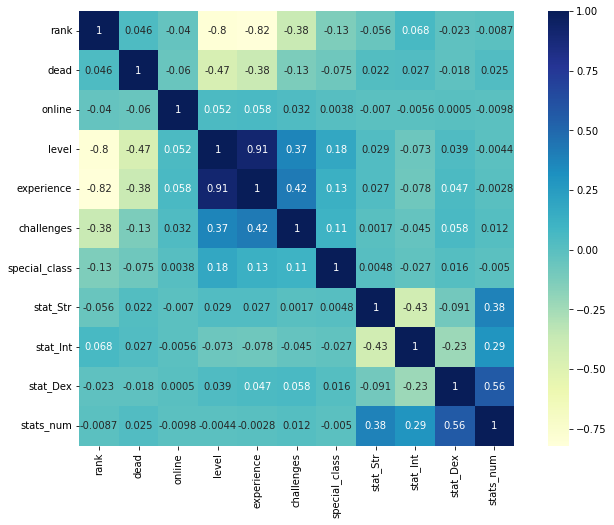

In [13]:
# ssf

plt.rcParams["figure.figsize"] = (12, 8)
sns.heatmap(ssf.corr(), annot = True, cmap = "YlGnBu", square = True)

 ### Commentary
  
 >볼만한 부분은 challenges와 level, experience이다. 
 
 약한 양의 상관관계가 있는데 (0.37, 0.42) 다시 생각해본다면 높은 경험치, 높은 레벨이더라도 꼭 시도가 상대적으로 적은 것이 아닐 수 있다는 생각을 할 수 있다. 
 
 > 또한 랭크와 challenges를 보면 -0.38의 약한 음의 상관관계가 보인다. 다시 말해 랭크가 높은 사람들(낮은 rank수)이라고 해서 시도가 적은 것이 아닐 수 있다는 생각을 할 수 있다. 
 
 > 그리고 stat의 세 컬럼과 rank를 보면 Str과 Int Dex 중 Int가 유일하게 양수이다. 
 
 stat 컬럼들은 0과 1로 더미 처리되어있고, 그저 선호도 정도만 알 수 있는 것이지만 ,  rank는 낮을수록 좋은 지표이기 때문에, 
 
 즉 이 랭커들 사이에서도 Int를 선택하지 않은 캐릭터들이 좀 더 높은 랭크를 갖고 있다는 것을 알 수 있다. 높은 랭크를 성공의 지표라고 생각한다면 성공한 사람들이 선호하는 직업은 Int가 포함되지 않은 클래스들인 것을 짐작할 수 있다.

<AxesSubplot:>

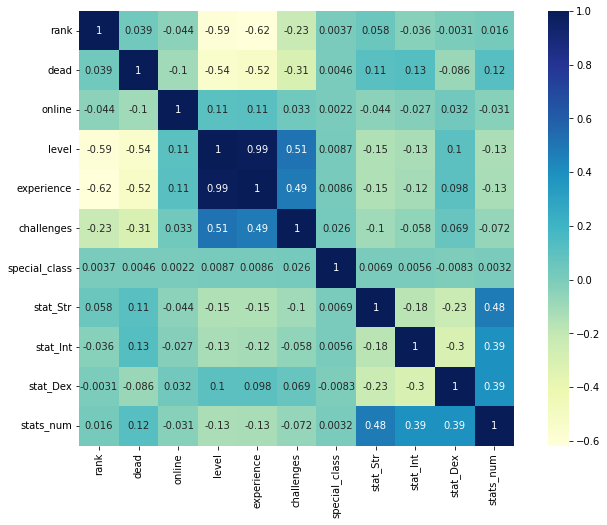

In [14]:
# non_ssf

plt.rcParams["figure.figsize"] = (12, 8)
sns.heatmap(non_ssf.corr(), annot = True, cmap = "YlGnBu", square = True)

 ### Commentary
 
non_ssf 모드(Harbinger, Harbinger Hardcore)에서는 challenge와 레벨/경험치와의 양의 상관관계가 조금 강해져있다. 

또한 rank와 experience, level은 좀 더 강한 음의 상관관계를 가지고 있다. 레벨/경험치가 상대적으로 적어도 높은 랭크를 딸 실력이 있는 유저들이 있다는 것이고

rank와 세 stat을 살펴보자면 이번에는 Str만 양, Int와 Dex는 음의 상관계수를 가지고 있다. 상대적으로 높은 랭크를 가지고 있는 사람들이 Int와 Dex를 찍은 비율이 높을 수 있겠다는 생각을 해볼 수 있다.

## classes

전체 클래스를 대상으로 나누어보는 정도만 진행하며, 클래스를 상세하게 보는 (이전에 만든 stat column들을 이용하는 분석)은 다음 파일에서 진행하려 한다.

In [15]:
# class set

classes = ['Marauder', 'Juggernaut', 'Berserker', 'Chieftain', 'Witch', 'Necromancer', 'Elementalist', 'Occultist', 'Ranger', 'Raider', 'Deadeye', 'Pathfinder', 'Duelist', 'Slayer', 'Gladiator', 'Champion', 'Shadow', 'Assassin', 'Saboteur', 'Trickster', 'Templar', 'Inquisitor', 'Hierophant', 'Guardian', 'Scion', 'Ascendant']

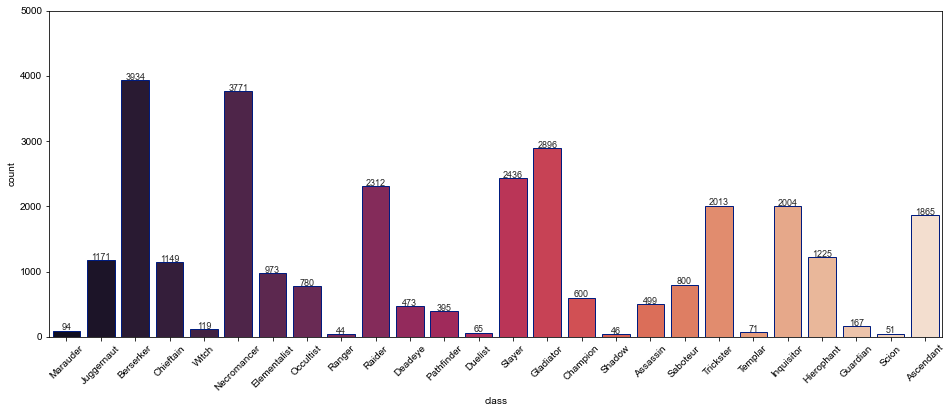

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


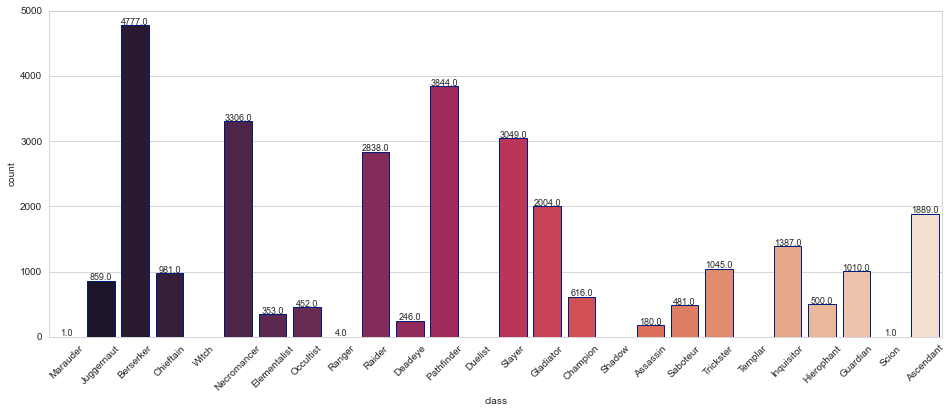

In [16]:
# ssf classes

plt.rcParams["figure.figsize"] = (16, 6)
plt.ylim(0, 5000)
sns.set_style('whitegrid')
ax = sns.countplot(data = ssf, x = 'class', order = classes,
              palette="rocket", edgecolor=sns.color_palette("dark", 1)) # palette = Accent, order = 설정한 class 리스트 순서

# 상단에 숫자표기하는 for문
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, height, ha = 'center', size = 9)

plt.xticks(rotation=45, fontsize=10)
plt.show()

# non_ssf classes

plt.rcParams["figure.figsize"] = (16, 6)
plt.ylim(0, 5000)
sns.set_style('whitegrid')
ax = sns.countplot(data = non_ssf, x = 'class', order = classes,
              palette="rocket", edgecolor=sns.color_palette("dark", 1)) # palette = Accent, order = 설정한 class 리스트 순서

# 상단에 숫자표기하는 for문
for p in ax.patches:
    height = p.get_height()
    if height != 'np.nan':
        ax.text(p.get_x() + p.get_width() / 2., height + 5, height, ha = 'center', size = 9)
    else:
        break

plt.xticks(rotation=45, fontsize=10)
plt.show()

### Commentary

non_ssf 모드의 경우 결측값이 존재해서 그것 때문에 숫자가 소수점과함께 지저분하게 기입되는데다가 오류메세지까지 뜨고 있다. 해결하고싶었지만 하지 못한 중생...

 > 일단, 전직전의 직업이 존재하지 않는다고 나오던 non_ssf 모드에서도 Ranger, Marauder, Scion이 존재하는 것으로 보이고 있다. 
 
 실제로 아래 정확한 수치 표에서 4, 1, 1의 수를 기록하고 있다.
 
 > HC와 아닐때를 나누었을 때와는 달리 두 분류 모두 Berserker가 1위로 나왔다. 
 
 > Inquisitor의 수는 SSF 모드에서 좀더 선호되는 것으로 나온다. 
 
 > 또한 SSF 모드에서는 선호되지 않던 Pathfinder의 수가 유독 눈에 띈다.
 
 > Slayer와 Raider, Shadow직군(?)의 수가 non_ssf 모드에서 좀 더 선호되는 것으로 보인다. 모두 민첩을 찍는 클래스들이다.

## class-users (클래스별 유저수 number)

In [17]:
# SSF 모드의 클래스별 유저 수

pivot_countuser_class_ssf = ssf.pivot_table(values = 'id', columns = 'class', aggfunc = 'count')
pivot_countuser_class_ssf.transpose()

,id
class,
Ascendant,1865
Assassin,499
Berserker,3934
Champion,600
Chieftain,1149
Deadeye,473
Duelist,65
Elementalist,973
Gladiator,2896


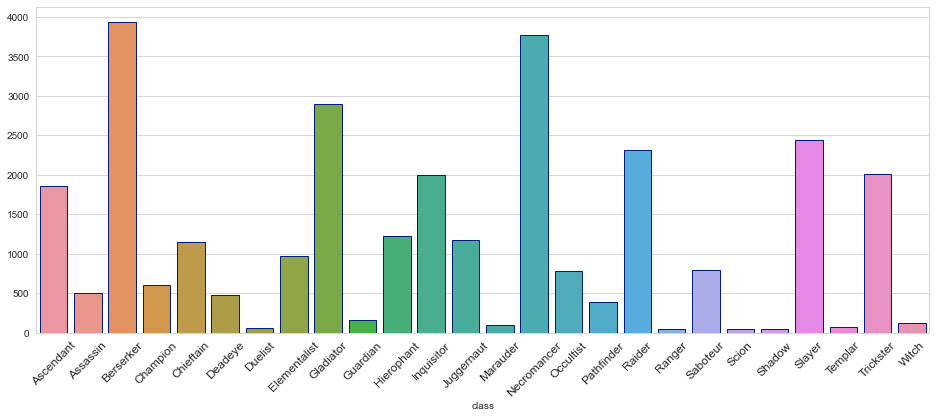

In [18]:
# 위와 같은 그래프를 그리게 되지만 ...

plt.rcParams["figure.figsize"] = (16, 6)
sns.barplot(data = pivot_countuser_class_ssf,
            edgecolor=sns.color_palette("dark", 1))
plt.xticks(rotation=45, fontsize=12)
plt.show()

In [19]:
# SSF가 아닌 모드 클래스별 유저 수

pivot_countuser_class_non_ssf = non_ssf.pivot_table(values = 'id', columns = 'class', aggfunc = 'count')
pivot_countuser_class_non_ssf.transpose()

,id
class,
Ascendant,1889
Assassin,180
Berserker,4777
Champion,616
Chieftain,981
Deadeye,246
Elementalist,353
Gladiator,2004
Guardian,1010


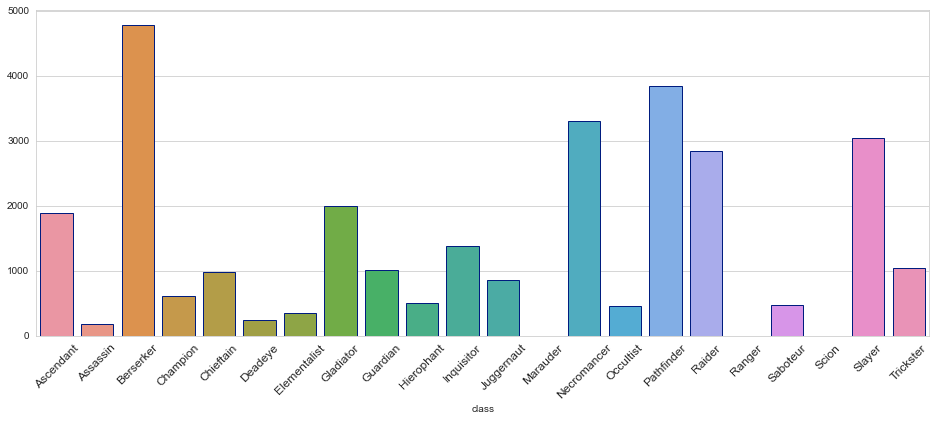

In [20]:
plt.rcParams["figure.figsize"] = (16, 6)
sns.barplot(data = pivot_countuser_class_non_ssf,
            edgecolor=sns.color_palette("dark", 1))
plt.xticks(rotation=45, fontsize=12)
plt.show()

## class- rank 

이번에는 SSF/ nonSSF 모드의 클래스별 랭크를 본다.

그래프에서의 order를 같게 하고싶지만 없는 값은 아예 오류가 나는 덕분에(?) 그대로 순서대로 나오도록 두는 중,,,


### Mean rank

In [21]:
# SSF 모드의 클래스별 평균 랭크

pivot_meanrank_class_ssf = ssf.pivot_table(values = 'rank', columns = 'class', aggfunc = 'mean')
pivot_meanrank_class_ssf.transpose()

,rank
class,
Ascendant,"7,631.16"
Assassin,"8,940.31"
Berserker,"7,078.63"
Champion,"7,109.38"
Chieftain,"7,225.37"
Deadeye,"9,010.15"
Duelist,"12,318.43"
Elementalist,"8,708.19"
Gladiator,"6,765.49"


In [22]:
pivot_meanrank_class_ssf.transpose().mean()

rank   8,824.35
dtype: float64

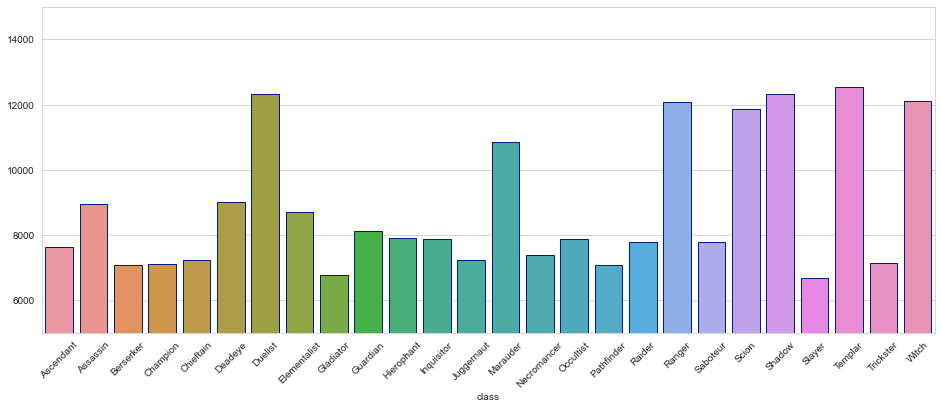

In [23]:
plt.rcParams["figure.figsize"] = (16, 6)
plt.ylim(5000, 15000)
sns.barplot(data = pivot_meanrank_class_ssf,
            edgecolor=sns.color_palette("dark", 1))
plt.xticks(rotation=45, fontsize=10)
plt.show()

In [24]:
# SSF가 아닌 모드의 클래스별 평균 랭크

pivot_meanrank_class_non_ssf = non_ssf.pivot_table(values = 'rank', columns = 'class', aggfunc = 'mean')
pivot_meanrank_class_non_ssf.transpose()

,rank
class,
Ascendant,"7,406.11"
Assassin,"8,514.39"
Berserker,"7,985.92"
Champion,"7,993.75"
Chieftain,"7,832.78"
Deadeye,"7,635.85"
Elementalist,"7,924.82"
Gladiator,"7,501.98"
Guardian,"5,942.24"


In [25]:
pivot_meanrank_class_non_ssf.transpose().mean()

rank   7,836.14
dtype: float64

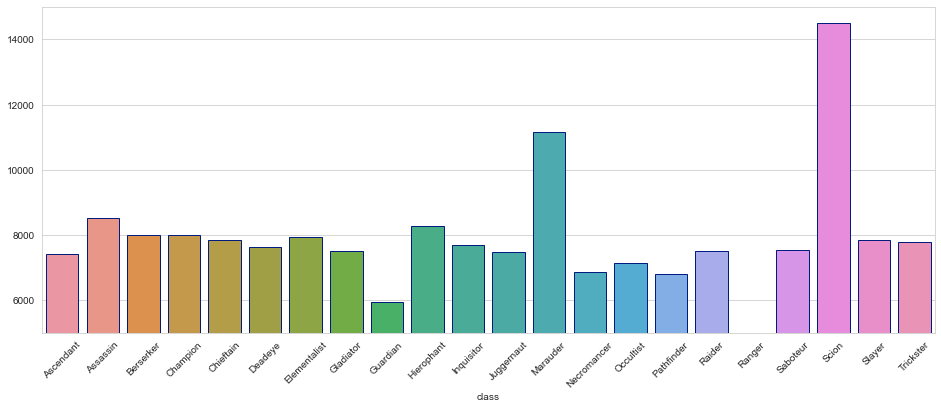

In [26]:
plt.rcParams["figure.figsize"] = (16, 6)
plt.ylim(5000, 15000)
sns.barplot(data = pivot_meanrank_class_non_ssf,
            edgecolor=sns.color_palette("dark", 1))
plt.xticks(rotation=45, fontsize=10)
plt.show()

#### Commentary

낮은 랭크일 수록 성적이 좋은 것임을 생각해보면 SSF 모드에서는 전체적으로 큰 차이를 보이지 않는데,
```
Slayer	6,695.83
Gladiator	6,765.49
Berserker	7,078.63
Pathfinder	7,081.02
Champion	7,109.38
```
반면 non_SSF 모드에서는 차이가 난다.

```
Ranger	3,097.75
Guardian	5,942.24
Pathfinder	6,798.53
Necromancer	6,871.07
Occultist	7,139.72
```

레인저가 특히 더 좋은 것으로 나타나고 있다.

그러나 이 평균은 간단하게 평균을 낸 것이기 때문에 정밀한 분석을 위해서는 가중 평균을 구하는 것이 좋을 것이라는 생각이 든다.

### Min rank

_스케일이 많이 다르기 때문에 그래프로는 비교하기 쉽지 않음을 이해해야 한다. 그대로 표로 보기로 한다._

In [27]:
# SSF 모드의 클래스별 최소 랭크 (가장 높은 랭크)

pivot_minrank_class_ssf = ssf.pivot_table(values = 'rank', columns = 'class', aggfunc = 'min')
pivot_minrank_class_ssf.transpose()

,rank
class,
Ascendant,14
Assassin,82
Berserker,16
Champion,16
Chieftain,9
Deadeye,210
Duelist,6042
Elementalist,9
Gladiator,2


In [28]:
pivot_minrank_class_ssf.transpose().mean()

rank   1,239.19
dtype: float64

In [29]:
# SSF가 아닌 모드의 클래스별 최소 랭크 (가장 높은 랭크)

pivot_minrank_class_non_ssf = non_ssf.pivot_table(values = 'rank', columns = 'class', aggfunc = 'min')
pivot_minrank_class_non_ssf.transpose()

,rank
class,
Ascendant,12
Assassin,119
Berserker,28
Champion,3
Chieftain,15
Deadeye,2
Elementalist,21
Gladiator,17
Guardian,15


In [30]:
pivot_minrank_class_non_ssf.transpose().mean()

rank   1,288.36
dtype: float64

#### Commentary

최소랭크 즉 그 중에서도 상위 랭크를 기록한 클래스들을 비교하도록 해본다.

10 위 안을 기록한 클래스들을 본다면 이러하다.

SSF모드에서는 
```
Necromancer	1
Slayer	1
Gladiator	2
Inquisitor	2
Raider	3
Chieftain	9
Elementalist	9
Hierophant	10
```

non_SSF 모드에서는
```
Necromancer	1
Deadeye	2
Champion	3
Inquisitor	4
Raider	4
Occultist	5
Slayer	5
Pathfinder	7
```

SSF 모드에서는 힘이, non_SSF 모드에서는 민첩이 조금 더 눈에 띈다.

## class- level

### Mean level

In [31]:
# SSF 모드의 클래스별 평균 레벨

pivot_meanlevel_class_ssf = ssf.pivot_table(values = 'level', columns = 'class', aggfunc = 'mean')
pivot_meanlevel_class_ssf.transpose()

,level
class,
Ascendant,77.33
Assassin,75.10
Berserker,78.82
Champion,77.72
Chieftain,76.77
Deadeye,75.34
Duelist,61.88
Elementalist,75.39
Gladiator,78.17


In [32]:
pivot_meanlevel_class_ssf.transpose().mean()

level   73.15
dtype: float64

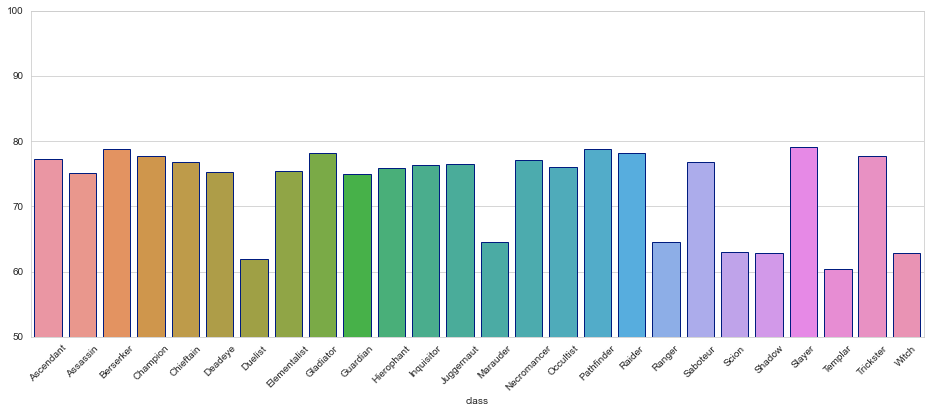

In [33]:
plt.rcParams["figure.figsize"] = (16, 6)
plt.ylim(50, 100)
sns.barplot(data = pivot_meanlevel_class_ssf,
            edgecolor=sns.color_palette("dark", 1))
plt.xticks(rotation=45, fontsize=10)
plt.show()

In [34]:
# SSF가 아닌 모드의 클래스별 평균 레벨

pivot_meanlevel_class_non_ssf = non_ssf.pivot_table(values = 'level', columns = 'class', aggfunc = 'mean')
pivot_meanlevel_class_non_ssf.transpose()

,level
class,
Ascendant,93.22
Assassin,93.77
Berserker,93.73
Champion,92.13
Chieftain,92.51
Deadeye,92.90
Elementalist,93.76
Gladiator,92.84
Guardian,93.87


In [35]:
pivot_meanlevel_class_non_ssf.transpose().mean()

level   92.89
dtype: float64

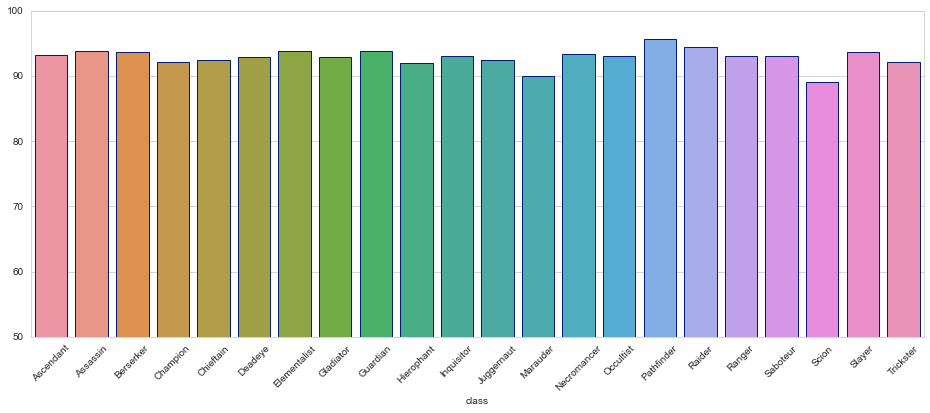

In [36]:
plt.rcParams["figure.figsize"] = (16, 6)
plt.ylim(50, 100)
sns.barplot(data = pivot_meanlevel_class_non_ssf,
            edgecolor=sns.color_palette("dark", 1))
plt.xticks(rotation=45, fontsize=10)
plt.show()

####  Commentary

73.15 < 92.89로, 
 전체적으로 SSF 모드에서의 평균 레벨이 더 낮은 것으로 나타났다. 

### Min level

In [37]:
# SSF 모드의 클래스별 최소 레벨 

pivot_minlevel_class_ssf = ssf.pivot_table(values = 'level', columns = 'class', aggfunc = 'min')
pivot_minlevel_class_ssf.transpose()

,level
class,
Ascendant,53
Assassin,53
Berserker,53
Champion,53
Chieftain,53
Deadeye,53
Duelist,53
Elementalist,53
Gladiator,53


In [38]:
pivot_minlevel_class_ssf.transpose().mean()

level   53.00
dtype: float64

In [39]:
# SSF가 아닌 모드의 클래스별 최소 레벨

pivot_minlevel_class_non_ssf = non_ssf.pivot_table(values = 'level', columns = 'class', aggfunc = 'min')
pivot_minlevel_class_non_ssf.transpose()

,level
class,
Ascendant,89
Assassin,89
Berserker,89
Champion,89
Chieftain,89
Deadeye,89
Elementalist,89
Gladiator,89
Guardian,89


In [40]:
pivot_minlevel_class_non_ssf.transpose().mean()

level   89.18
dtype: float64

 #### Commentary
 
 non ssf의 경우 89~92로 다양하지만 SSF 모드는 53으로 일정하다. 이는 SSF Harbinger HC 모드의 입장 선 때문인 것으로 생각한다. 다시 나누어 보면 다음과 같다.
 
 

In [41]:
ssf.groupby(by = 'ladder')['level'].min()

ladder
SSF Harbinger       73
SSF Harbinger HC    53
Name: level, dtype: int64

In [42]:
non_ssf.groupby(by = 'ladder')['level'].min()

ladder
Harbinger             94
Hardcore Harbinger    89
Name: level, dtype: int64

## class - challenges

### Mean challenges

In [43]:
# SSF 모드의 클래스별 평균 트라이 회수

pivot_meanchal_class_ssf = ssf.pivot_table(values = 'challenges', columns = 'class', aggfunc = 'mean')
pivot_meanchal_class_ssf.transpose()

,challenges
class,
Ascendant,21.70
Assassin,20.46
Berserker,21.86
Champion,20.10
Chieftain,20.56
Deadeye,19.87
Duelist,15.68
Elementalist,18.86
Gladiator,21.22


In [44]:
pivot_meanchal_class_ssf.transpose().mean()

challenges   19.61
dtype: float64

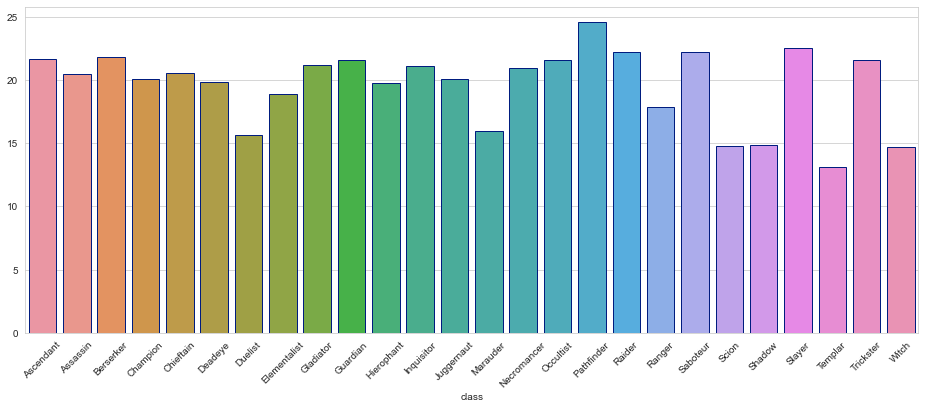

In [45]:
plt.rcParams["figure.figsize"] = (16, 6)
sns.barplot(data = pivot_meanchal_class_ssf,
            edgecolor=sns.color_palette("dark", 1))
plt.xticks(rotation=45, fontsize=10)
plt.show()

In [46]:
# SSF가 아닌 모드의 클래스별 평균 트라이 회수

pivot_meanchal_class_non_ssf = non_ssf.pivot_table(values = 'challenges', columns = 'class', aggfunc = 'mean')
pivot_meanchal_class_non_ssf.transpose()

,challenges
class,
Ascendant,30.53
Assassin,30.30
Berserker,30.29
Champion,27.98
Chieftain,28.80
Deadeye,29.52
Elementalist,30.90
Gladiator,27.83
Guardian,31.57


In [47]:
pivot_meanchal_class_non_ssf.transpose().mean()

challenges   28.50
dtype: float64

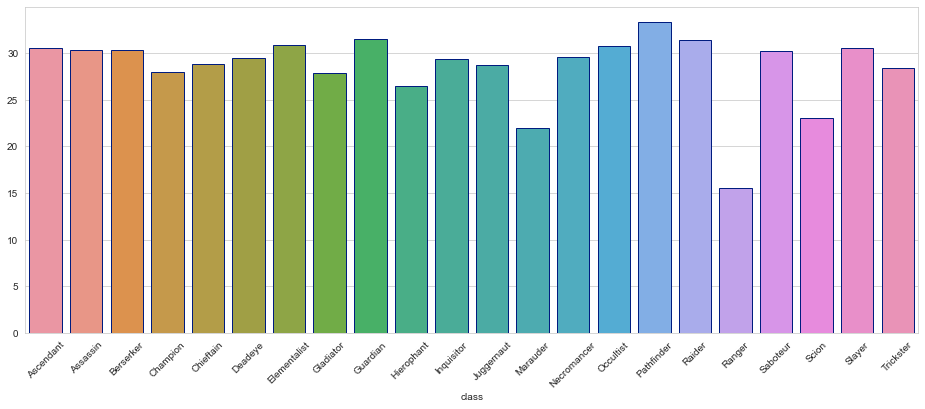

In [48]:
plt.rcParams["figure.figsize"] = (16, 6)
sns.barplot(data = pivot_meanchal_class_non_ssf,
            edgecolor=sns.color_palette("dark", 1))
plt.xticks(rotation=45, fontsize=10)
plt.show()

### Min Challenges

In [49]:
# SSF 모드의 클래스별 최소 트라이 횟수

pivot_minchal_class_ssf = ssf.pivot_table(values = 'challenges', columns = 'class', aggfunc = 'min')
pivot_minchal_class_ssf.transpose()

,challenges
class,
Ascendant,5
Assassin,7
Berserker,5
Champion,6
Chieftain,7
Deadeye,7
Duelist,7
Elementalist,6
Gladiator,5


In [50]:
pivot_minchal_class_ssf.transpose().mean()

challenges   6.19
dtype: float64

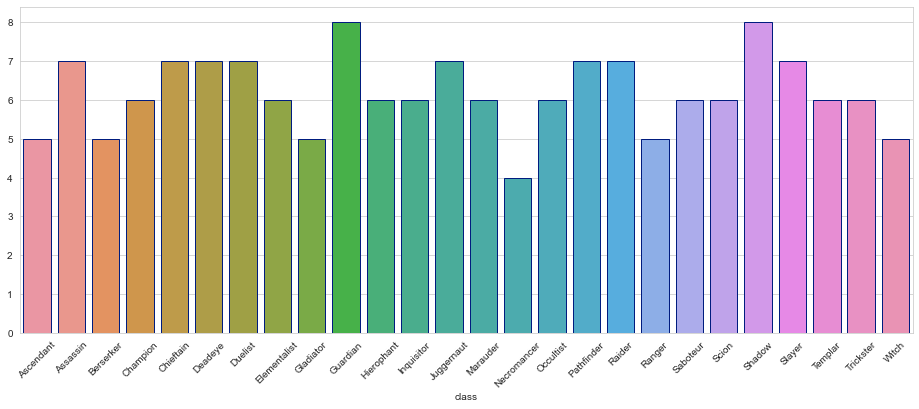

In [51]:
plt.rcParams["figure.figsize"] = (16, 6)
sns.barplot(data = pivot_minchal_class_ssf,
            edgecolor=sns.color_palette("dark", 1))
plt.xticks(rotation=45, fontsize=10)
plt.show()

In [52]:
# SSF가 아닌 모드의 클래스별 최소 트라이 횟수

pivot_minchal_class_non_ssf = non_ssf.pivot_table(values = 'challenges', columns = 'class', aggfunc = 'min')
pivot_minchal_class_non_ssf.transpose()

,challenges
class,
Ascendant,14
Assassin,15
Berserker,12
Champion,8
Chieftain,12
Deadeye,16
Elementalist,14
Gladiator,14
Guardian,11


In [53]:
pivot_minchal_class_non_ssf.transpose().mean()

challenges   14.00
dtype: float64

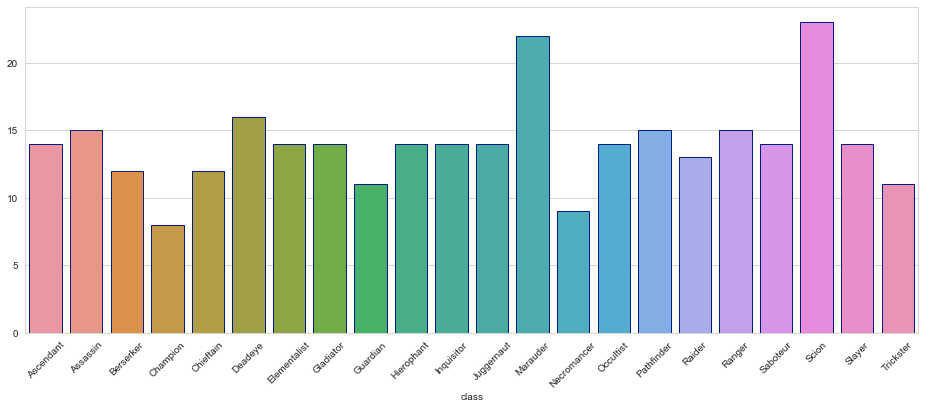

In [54]:
plt.rcParams["figure.figsize"] = (16, 6)
sns.barplot(data = pivot_minchal_class_non_ssf,
            edgecolor=sns.color_palette("dark", 1))
plt.xticks(rotation=45, fontsize=10)
plt.show()

### Commentary

평균적인 챌린지 수는 ssf = 19.61, non_ssf = 28.50 으로 non_ssf 모드가 더 많은 것으로 나타났는데, SSF 그 안에서도 전직하지 않은 상태의 직업이 더 적게 시도를 한 것으로 보이고 있다.

최소로 본다면 두 모드 모두 Necromancer가 있으며, 더 뽑는다면 Champion, Berserker 가 있다. 다시 말해 이들은 혼자서든 파티에서든 괜찮은 성능을 내는 것으로 생각해 볼 수 있다.

전체적으로 최소 시도의 평균보다 적은 직업을 보면

``` 
# ssf
Necromancer	4
Ascendant	5
Berserker	5
Gladiator	5
Ranger	5
Witch	5
Champion	6
Elementalist	6
Hierophant	6
Inquisitor	6
Marauder	6
Occultist	6
Saboteur	6
Scion	6
Templar	6
Trickster	6
```

``` 
# non_ssf
Champion	8
Necromancer	9
Guardian	11
Trickster	11
Berserker	12
Chieftain	12
Raider	13
```
 로 분포해있다. 
 
 


## rank

--- 

여기서부터는 클래스와 떼어서 각각을 보려 한다.

### ssf level distribution

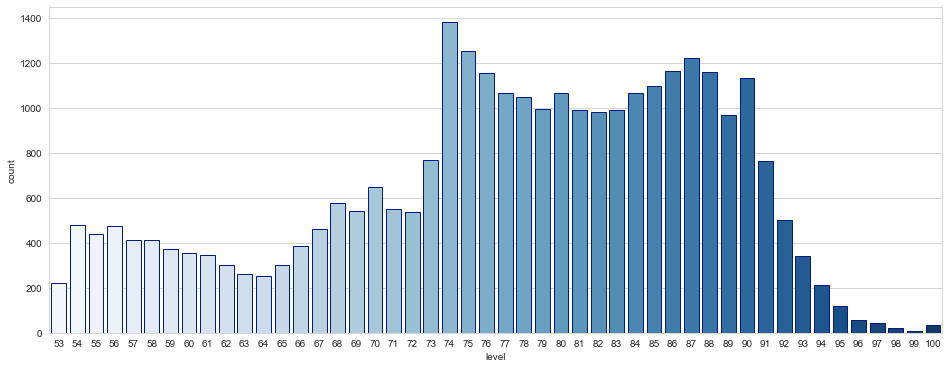

In [55]:
plt.rcParams["figure.figsize"] = (16, 6)
sns.set_style('whitegrid')
sns.countplot(data = ssf, x = 'level', 
              palette="Blues", edgecolor=sns.color_palette("dark", 1)) #palette = Accent
plt.show()

### non_ssf level distribution

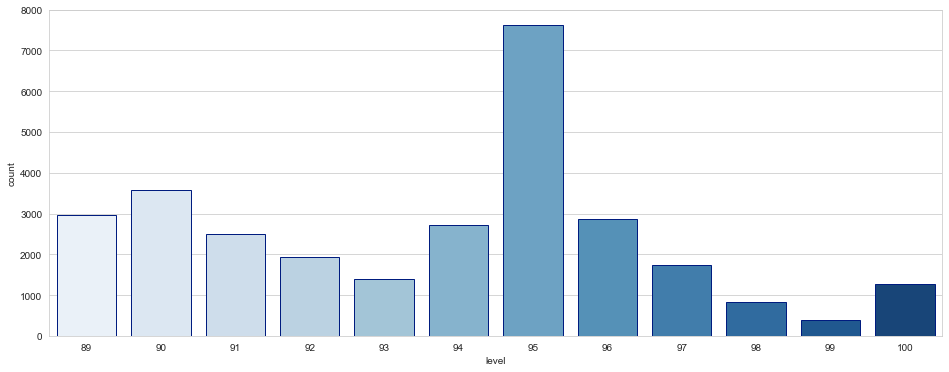

In [56]:
plt.rcParams["figure.figsize"] = (16, 6)
sns.set_style('whitegrid')
sns.countplot(data = non_ssf, x = 'level', 
              palette="Blues", edgecolor=sns.color_palette("dark", 1)) #palette = Accent
plt.show()

 ### commentary
 
 정말 재밌는 결과! 레벨이 유의미하게 나누어지는 것이 SSF와 SSF가 아닌 모드인 것이었다!!!
 
 위에서도 확인했었듯이 non_ssf 모드에서의 랭크 캐릭터들의 최소 레벨이 89부터 시작했던 점을 다시 떠올릴 수 있다.
 
 > non_ssf 모드에서는 95레벨이 가장 많은 수를 차지하고 있으며 실제로 그 95레벨 주위의 값이 적지 않다.
 
 > 하지만 ssf 모드에서는 73레벨이 가장 높으며, 90레벨은 많았으나 90레벨 이상에서는 급격히 감소한다.
 
 그래프 도합 각각 약 3만 개의 캐릭터임을 감안하면 감소하는 90 레벨이상의 데이터들도 아주 적은 숫자는 아니지만, 상대적으로 SSF모드는 적은 레벨에서부터도 많이 시도하는 것으로 보인다.
 
 _현재 y의 스케일이 많이 차이가 나는데, 그래프를 볼 때 주의해야 하는 부분이다._

## exp

경험치는 연속형 변수이기 때문에 구간을 나누어주어서 간단하게 분포를 보려한다. 

### ssf exp distribution

array([[<AxesSubplot:title={'center':'experience'}>]], dtype=object)

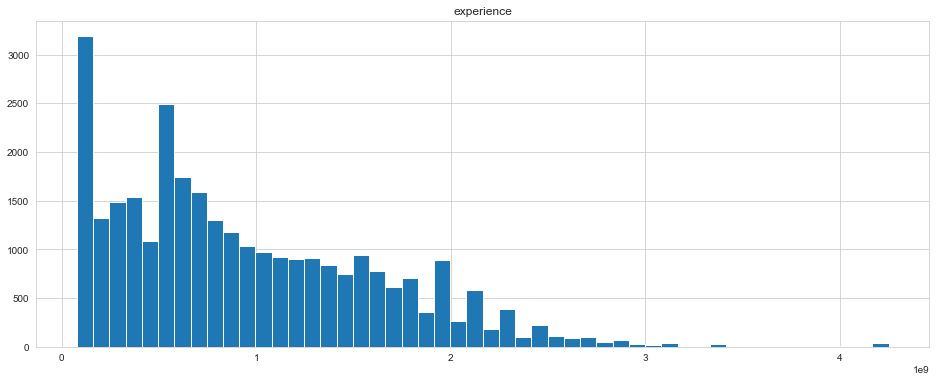

In [57]:
ssf.hist(column = 'experience', figsize=(16, 6), bins=50)

### non_ssf exp distribution

array([[<AxesSubplot:title={'center':'experience'}>]], dtype=object)

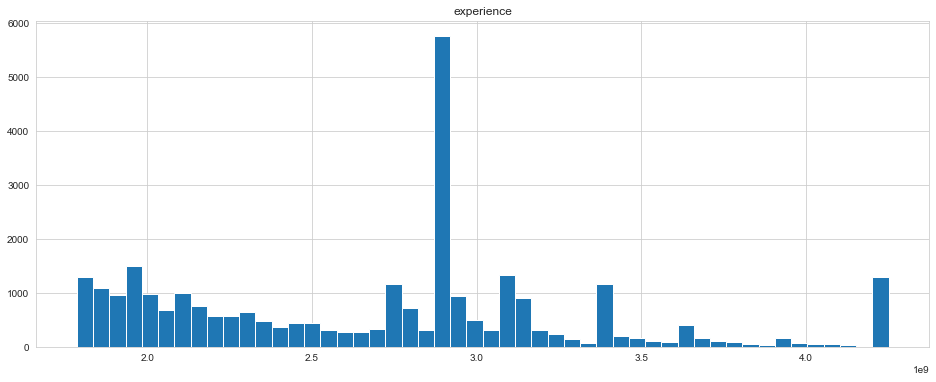

In [58]:
non_ssf.hist(column = 'experience', figsize = (16, 6), bins = 50)

## online

### ssf - online or offline

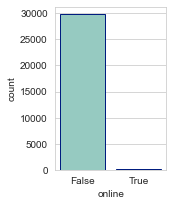

In [59]:
plt.rcParams["figure.figsize"] = (2, 3)
sns.set_style('whitegrid')
sns.countplot(data = ssf, x = 'online', 
              palette="Set3", edgecolor=sns.color_palette("dark", 1))
plt.show()

### non_ssf - online or offline

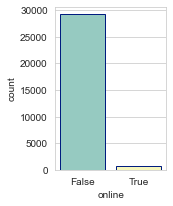

In [60]:
plt.rcParams["figure.figsize"] = (2, 3)
sns.set_style('whitegrid')
sns.countplot(data = non_ssf, x = 'online', 
              palette="Set3", edgecolor=sns.color_palette("dark", 1))
plt.show()

그럼 전체 중 접속률은?

In [61]:
ssf['online'].value_counts()/sum(ssf['online'].value_counts())*100

False   99.36
True     0.64
Name: online, dtype: float64

In [62]:
non_ssf['online'].value_counts()/sum(non_ssf['online'].value_counts())*100

False   97.73
True     2.27
Name: online, dtype: float64

### Commentary

ssf mode's rankers online rate = 0.9-1.0%

non_ssf mode's rankers online rate = 2.2%

## 3 stats and thier corr

### ssf

In [63]:
ssf[['class', 'stat_Str', 'stat_Int', 'stat_Dex', 'stats_num']].sample(10)

,class,stat_Str,stat_Int,stat_Dex,stats_num
58933,Templar,1,1,0,2
25183,Raider,0,0,1,1
6540,Inquisitor,1,1,0,2
38699,Berserker,1,0,0,1
9370,Berserker,1,0,0,1
23292,Necromancer,0,1,0,1
44912,Pathfinder,0,0,1,1
35069,Raider,0,0,1,1
11951,Berserker,1,0,0,1
24398,Juggernaut,1,0,0,1


In [64]:
ssf[['class', 'stat_Str', 'stat_Int', 'stat_Dex', 'stats_num']].corr()

,stat_Str,stat_Int,stat_Dex,stats_num
stat_Str,1.00,-0.43,-0.09,0.38
stat_Int,-0.43,1.00,-0.23,0.29
stat_Dex,-0.09,-0.23,1.00,0.56
stats_num,0.38,0.29,0.56,1.00


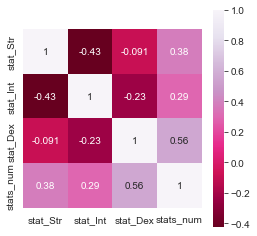

In [65]:
plt.rcParams["figure.figsize"] = (4, 4)
sns.heatmap(ssf[['stat_Str', 'stat_Int', 'stat_Dex', 'stats_num']].corr(),
            annot = True, square=True, cmap = 'PuRd_r')
plt.show()

### non_ssf

In [66]:
non_ssf[['class', 'stat_Str', 'stat_Dex', 'stat_Int', 'stats_num']].sample(10)

,class,stat_Str,stat_Dex,stat_Int,stats_num
11528,Necromancer,0,0,1,1
36226,Chieftain,1,0,0,1
35444,Pathfinder,0,1,0,1
13388,Pathfinder,0,1,0,1
47479,Slayer,1,1,0,2
39190,Berserker,1,0,0,1
43898,Necromancer,0,0,1,1
5820,Necromancer,0,0,1,1
8578,Slayer,1,1,0,2
6925,Necromancer,0,0,1,1


In [67]:
non_ssf[['class', 'stat_Str', 'stat_Dex', 'stat_Int', 'stats_num']].corr()

,stat_Str,stat_Dex,stat_Int,stats_num
stat_Str,1.00,-0.23,-0.18,0.48
stat_Dex,-0.23,1.00,-0.30,0.39
stat_Int,-0.18,-0.30,1.00,0.39
stats_num,0.48,0.39,0.39,1.00


<AxesSubplot:>

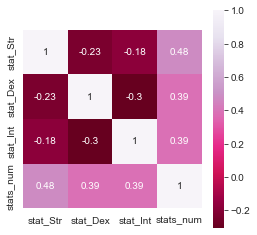

In [68]:
sns.heatmap(data = non_ssf[['class', 'stat_Str', 'stat_Dex', 'stat_Int', 'stats_num']].corr(), 
           annot = True, cmap = 'PuRd_r', square = True)

### Commentary

_이게 선호도로 볼것인지 성능으로 볼 것인지는 유저하나하나를 까면서 분석을해도 모자라기 때문에, 이미 이 15000등 안에 들은 유저들은 어느정도 실력이 최고에 도달한 비슷비슷한 고수들이라고 가정하는 것이 편하기 때문에 선호도로 보기로 했다._

더미 변수로 변환한 변수에다가, 그들을 더하기만한 변수 stats_num이다. 정말 쓸모없어보일 수 있지만, 이런 부분들은 볼 수 있다.

stats_num 과 다른 변수들과의 계수를 보면 SSF 모드에서는 민첩이 0.56, 그리고 힘과 지능이 0.38, 0.29이다. 

non_SSF 모드에서는 힘이 0.48, 그리고 민첩과 지능이 0.29이다.

> 전체적으로 보았을 때, 랭커들은 SSF모드에서는 민첩을 많이 선호하는 경향이 있으며, non_SSF 모드에서 힘을 적지 않게 선호하지만 그 선호도 보다 더 강하게 선호하는 경향이 있다는 것이다.

> 또한 각 스탯끼리 음의 상관관계가 강할수록 같이 찍지 않는 경향인 것으로 볼 수 있다.

